#### In this project I use the Banknote authentication dataset from UCI repository to identify whether or not a bank note was authentic. 

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import tensorflow.contrib.learn as learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## Data

In [97]:
col=["Variance", "Skewness", "Curtosis", "Entropy","Class"]
data= pd.read_csv('../input/data_banknote_authentication.csv',names=col)

In [98]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [99]:
data.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

#### The class column indicates whether or not the note was authentic.

## EDA

### Countplot of the classes (Authentic =1, Fake=0)

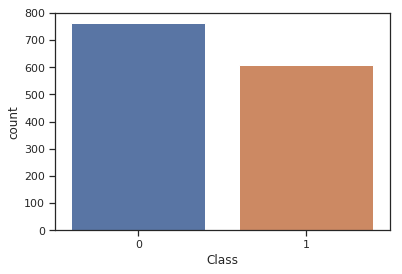

In [100]:
sns.countplot(x='Class',data=data)

### Pairplot of data with hue as class

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


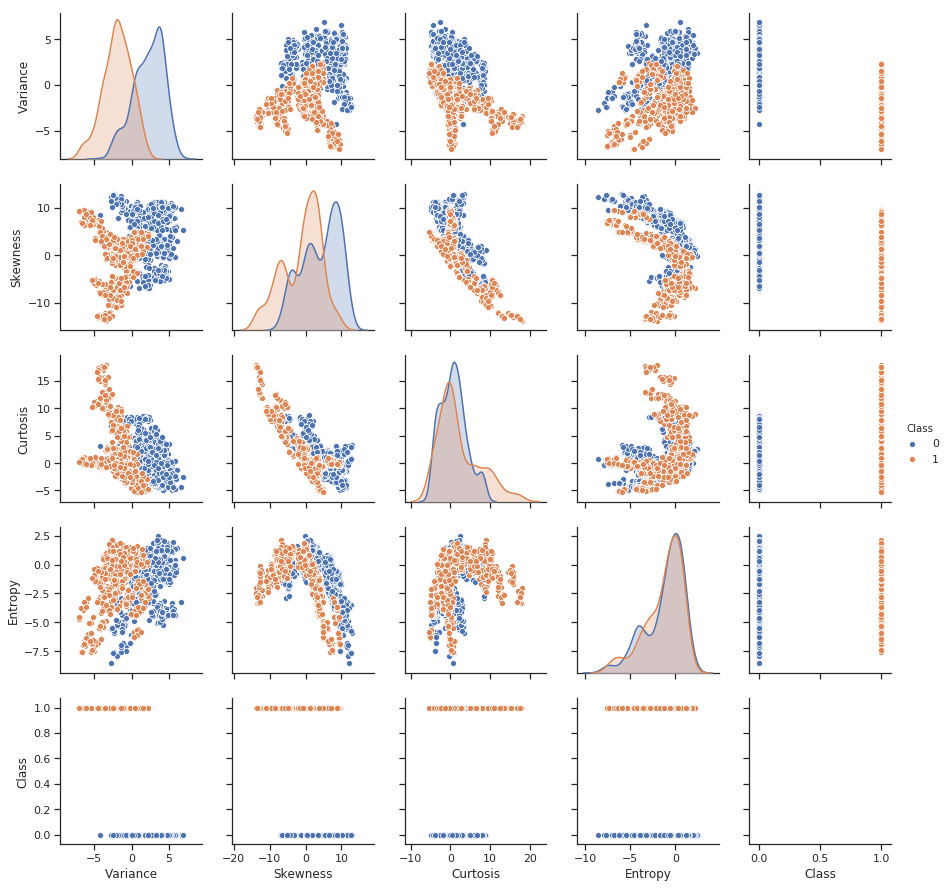

In [101]:
sns.set(style="ticks", color_codes=True)
g= sns.pairplot(data, hue='Class')

#### For most of the features the data is seperated clearly for the 2 classes.

## Data Prepration

### Standard Scaling

In [102]:
scaler= StandardScaler()

In [103]:
scaler.fit(data.drop('Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [104]:
scaled_features = scaler.fit_transform(data.drop('Class', axis=1))

In [105]:
df_feat= pd.DataFrame(scaled_features, columns=data.columns[:-1])
df_feat.head()

,Variance,Skewness,Curtosis,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

In [107]:
X= df_feat
y= data['Class']

In [108]:
# TensorFlow only takes data as Numpy array
X= X.values
y= y.values

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Classifier

In [129]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=1)]
classifier= learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,10,10], n_classes=2)

In [130]:
classifier.fit(X_train, y_train, steps=200, batch_size=20)

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7fe6d8008a20>, 'hidden_units': [10, 10, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7fe75c14bea0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

## Model Evaluation

In [131]:
note_predictions = list(classifier.predict(X_test))

In [132]:
print(confusion_matrix(y_test,note_predictions))

[[219   0]
 [  0 193]]


In [133]:
print(classification_report(y_test, note_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       193

   micro avg       1.00      1.00      1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



## Comparison

#### The result of DNN model is very accurate so I compare the result with Random Forest Classifier.

In [134]:
rfc= RandomForestClassifier(n_estimators=200)

In [135]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [136]:
rfc_predictions= rfc.predict(X_test)

In [137]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       219
           1       0.99      1.00      0.99       193

   micro avg       1.00      1.00      1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [138]:
print(confusion_matrix(y_test,rfc_predictions))

[[217   2]
 [  0 193]]
